# Nonlinear regression for KL

[Complex-Valued Random Variable](https://www.mins.ee.ethz.ch/teaching/wirelessIT/handouts/miscmath1.pdf)

[Caution: The Complex Normal Distribution!](http://www.ee.imperial.ac.uk/wei.dai/PaperDiscussion/Material2014/ReadingGroup_May.pdf)

[Variational Dropout Sparsifies Deep Neural Networks](https://arxiv.org/pdf/1701.05369.pdf)

In [ ]:
import time
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
dttm = time.strftime("%Y%m%d-%H%M%S")
dttm

In [ ]:
np.random.randint(0x7fff_ffff)

Consider a complex random vector $z \in \mathbb{C}^d$
$$
    z \sim \mathcal{CN}_d \bigl(\theta, K, C \bigr)
        \Leftrightarrow
        \begin{pmatrix}\Re z \\ \Im z\end{pmatrix}
            \sim \mathcal{N}_{2 d} \biggl(
                \begin{pmatrix}\Re \theta \\ \Im \theta \end{pmatrix},
                \tfrac12 \begin{pmatrix}
                     \Re (K + C) & - \Im (K - C) \\
                     \Im (K + C) & \Re (K - C)
                \end{pmatrix}
            \biggr)
    \,. $$

If $x \sim \mathcal{N}_{2n}\Bigl( \mu, \Sigma\Bigr)$ with $x = (x_1, x_2)$, then $z = x_1 + i x_2$
is a complex gaussian random vector,  $z \sim \mathcal{CN}_n(\mu_1 + i \mu_2, K, C)$ with
$$
\begin{align}
    K &= \Sigma_{11} + \Sigma_{22} + i (\Sigma_{21} - \Sigma_{12})
        \,, \\
    C &= \Sigma_{11} - \Sigma_{22} + i (\Sigma_{21} + \Sigma_{12})
        \,.
\end{align}
$$
Note that $\Sigma_{12} = \Sigma_{21}^\top$, and $\Sigma_{11}, \Sigma_{22} \succeq 0$ imply that
$K\succeq 0$, $K^H = K$, $C = C^\top$, and $\overline{\Gamma} \succeq \overline{C} \Gamma^{-1} C $.

If $A\in \mathbb{C}^{n\times d}$ and $b\in \mathbb{C}^n$, then
$$
    A z + b \sim \mathcal{CN}_n \bigl(A \theta + b, A K A^H, A C A^\top \bigr)
    \,. $$

Indeed,
$$
    \mathbb{E} Az + b = A \mathbb{E} z + b = A \theta + b
    \,, $$
and for $\xi = Az - A\theta$ we have
$$
    \mathbb{E} A (z-\theta)(z-\theta)^H A^H = A K A^H
    \,,
    \mathbb{E} A (z-\theta)(z-\theta)^\top A^\top = A C A^\top
    \,. $$

<br>

A complex vector is called _proper_ (or circularly-symmetric) iff the pseudo-covariance
matrix $C$ vanishes. This means that the corresponding blocks in the double-vector real
representation obey $\Sigma_{11} = \Sigma_{22}$ and $\Sigma_{21} = - \Sigma_{12}$. This
last condition implies that $\Sigma_{12}$ is skew-symmetric: $\Sigma_{12} = -\Sigma_{12}^\top$.
This also means that the real and imaginary components of each element of $z$ are
uncorrelated, since skew-symmetry means that its main diagonal is zero.

<br>

The entropy of a generic gaussian random vector $x\sim q(x) = \mathcal{N}_d(x\mid\mu ,\Sigma)$
is
$$
    \mathbb{E}_{x\sim q} \log q(x)
        = - \tfrac{d}2\log 2\pi - \tfrac12 \log\det\Sigma
        - \tfrac12 \mathbb{E}_{x\sim q}\mathop{tr}{\Sigma^{-1} (x-\mu)(x-\mu)^\top}
        = - \tfrac12 \log\det 2\pi e \Sigma
    \,. $$

Therefore the entropy of a gaussian complex random vector $z\sim \mathcal{CN}_d(\theta, K, C)$
is exaclty the entropy of the $2d$ double-real gaussian vector with a special
convariance structure: for $z\sim q(z) = \mathcal{CN}_d(z\mid \theta, K, C)$
$$
    \mathbb{E}_{z\sim q} \log q(z)
        = - \tfrac12 \log\det \pi e \begin{pmatrix}
                 \Re (K + C) & \Im (- K + C) \\
                 \Im (K + C) & \Re (K - C)
            \end{pmatrix}
        = - \tfrac{2d}2 \log\pi e
        - \tfrac12 \log\det \begin{pmatrix}
                 \Re (K + C) & \Im (- K + C) \\
                 \Im (K + C) & \Re (K - C)
            \end{pmatrix}
    \,. $$
If $C=0$, i.e. the complex vector is proper, then
$$
    \det \begin{pmatrix}
         \Re (K + C) & \Im (- K + C) \\
         \Im (K + C) & \Re (K - C)
    \end{pmatrix}
        = \det \begin{pmatrix}
             \Re K & - \Im K \\
             \Im K & \Re K
        \end{pmatrix}
        = \det \hat{K}
        = \det K \overline{\det K}
        = \lvert \det K \rvert^2
        \,, $$
whence the differential entropy becomes
$$
    \mathbb{E}_{z\sim q} \log q(z)
        = - \log (\pi e)^d\lvert \det K\rvert
        = - \log \lvert \det \pi e K\rvert
    \,. $$

<br>

Let $q$ be any distribution on $z$: a product with block terms, or even dirac $\delta_{z_*}$
distributions (for MLE), a mixture or whatever. $q$ may depend on anything, even $\theta$!

Then
$$
    \log p(D; \theta)
        % = \mathbb{E}_{z\sim q} \log p(D; \theta)
        % = \mathbb{E}_{z\sim q} \log \tfrac{p(D, z; \theta)}{p(z\mid D; \theta)}
        = \underbrace{
            \mathbb{E}_{z\sim q} \log \tfrac{p(D, z; \theta)}{q(z)}
        }_{\mathfrak{L}(\theta, q)}
        + \underbrace{
            \mathbb{E}_{z\sim q} \log \tfrac{q(z)}{p(z\mid D; \theta)}
        }_{KL(q \| p(\cdot \mid D; \theta))}
        = \mathbb{E}_{z\sim q} \log p(D\mid z; \theta)
        - \mathbb{E}_{z\sim q} \log \tfrac{q(z)}{p(z)}
        + \mathbb{E}_{z\sim q} \log \tfrac{q(z)}{p(z\mid D; \theta)}
    \,, $$
is constant w.r.t. $q$ at any $\theta$. Since KL-divergence is nonnegative (from
Jensen's inequality), the Evidence Lower Bound $\mathfrak{L}(\theta, q)$ bound the
original log-likelihood $\log p(D; \theta)$ from below.

Let's maximize the ELBO with respec to $q$ and $\theta$. However, since the whole
right hand side is constant with respect to $q$, maximization of $\mathfrak{L}(\theta, q)$
w.r.t. $q \in \mathcal{F}$ (holding $\theta$ fixed) is equivalent to minimizing
$KL(q \| p(\cdot \mid D; \theta))$ w.r.t. $q$. This is the E-step of the EM.

The M-step is maximizing the ELBO over $\theta$ holding $q$ fixed. Note that some of
$q$ may be `offlaid` to the M-step from the E-step!

<br>

Suppose that the prior $p(z)$ and the variational distribution are fully factorized:
$p(z) = \otimes_{\omega} p(z_\omega)$, $q(z) = \otimes_{\omega} q(z_\omega)$. Then
$$
    \mathbb{E}_{z\sim q} \log \tfrac{q(z)}{p(z)}
        = \sum_\omega \mathbb{E}_{z\sim q} \log \tfrac{q(z_\omega)}{p(z_\omega)}
        = \sum_\omega \mathbb{E}_{q(z_\omega)} \log \tfrac{q(z_\omega)}{p(z_\omega)}
    \,. $$
<span style="color:red">**NOTE**</span> we treat $p$ and $q$ as symbols, represending
the density of the argument random variable w.r.t. some carrier measure.

$$
    z_\omega
        = \theta_\omega \varepsilon_\omega
    \,,
    \varepsilon_\omega
        \sim \mathcal{CN}(1, \alpha_\omega, 0)
    \Leftrightarrow
    z_\omega
        \sim \mathcal{CN}(\theta_\omega, \alpha_\omega \lvert \theta_\omega\rvert^2, 0)
    \,. $$

Suppose $q(z) = \mathcal{CN}(\theta, \alpha \lvert\theta\rvert^2, 0)$ and
$p(z) \propto \lvert z\rvert^{-\beta}$. Each term in the sum
$$
\begin{align}
    KL(q\|p)
        &= \mathbb{E}_{q(z)} \log \tfrac{q(z)}{p(z)}
        = \mathbb{E}_{q(z)} \log q(z) - \mathbb{E}_{q(z)} \log p(z)
        \\
        &= - \log \bigl\lvert \pi e \alpha \lvert\theta\rvert^2 \bigr\rvert
        + \beta \mathbb{E}_{q(z)} \log \lvert z\rvert
        + C
        \\
        &= - \log \pi e
        - \log \alpha \lvert\theta\rvert^2
        + \beta \mathbb{E}_{\varepsilon \sim \mathcal{CN}(1, \alpha, 0)}
            \log \lvert \theta \rvert \lvert \varepsilon\rvert
        + C
        \\
        &= - \log \pi e - \log \alpha
        + \tfrac{\beta - 2}2 \log \lvert \theta \rvert^2
        + \beta \mathbb{E}_{\varepsilon \sim \mathcal{CN}(1, \alpha, 0)}
            \log \lvert \varepsilon\rvert
        + C
        \\
        &= - \log \pi e - \log \alpha
        + \tfrac{\beta - 2}2 \log \lvert \theta \rvert^2
        + \tfrac\beta2 \mathbb{E}_{z \sim \mathcal{CN}(0, \alpha, 0)}
            \log \bigl\lvert z + 1 \bigr\rvert^2
        + C
        \\
        &= - \log \pi e - \log \alpha
        + \tfrac{\beta - 2}2 \log \lvert \theta \rvert^2
        + \tfrac\beta2 \mathbb{E}_{\varepsilon \sim \mathcal{N}_2\bigl(0, \tfrac\alpha2 I\bigr)}
            \log \bigl((\varepsilon_1 + 1)^2 + \varepsilon_2^2\bigr)
        + C
\end{align}
\,. $$

For $\beta = 2$ the parameter $\theta$ vanishes from the divergence,
and it becomes just the expectation.

Compare this expression to the real variational dropout: for
$q(z) = \mathcal{N}(\theta, \alpha \theta^2)$ and $p(z) \propto \lvert z\rvert^{-1}$
we have
$$
\begin{align}
    KL(q\|p)
        &= \mathbb{E}_{q(z)} \log \tfrac{q(z)}{p(z)}
        = \mathbb{E}_{q(z)} \log q(z) - \mathbb{E}_{q(z)} \log p(z)
        \\
        &= - \tfrac12 \log 2 \pi e - \tfrac12 \log \alpha \theta^2
        + \mathbb{E}_{\xi \sim \mathcal{N}(0, \alpha)}
            \log \bigl\lvert \theta (\xi + 1) \bigr\rvert
        + C
        \\
        &= - \tfrac12 \log 2 \pi e - \tfrac12 \log \alpha
        + \tfrac12 \mathbb{E}_{\xi \sim \mathcal{N}(0, \alpha)}
            \log (\xi + 1)^2
        + C
\end{align}
\,. $$

<br>

In [ ]:
# random_state = np.random.RandomState(575727528)
# random_state = np.random.RandomState()

Negative kl-div approximation from arxiv:1701.05369.
$$
    - KL(\mathcal{N}(w\mid \theta, \alpha \theta^2) \|
            \tfrac1{\lvert w \rvert})
        = \tfrac12 \log \alpha
          - \mathbb{E}_{\xi \sim \mathcal{N}(1, \alpha)}
            \log{\lvert \xi \rvert} + C
        \approx
            k_1 \sigma(k_2 + k_3 \log \alpha) + C \big\vert_{C = -k1}
            - \tfrac12 \log (1 + e^{-\log \alpha})
    \,. $$

In [ ]:
import tqdm

def kldiv_real_mc(log_alpha, m=1e5):
    kld, m = 0.5 * log_alpha, int(m)
    for i, la in enumerate(tqdm.tqdm(log_alpha)):
        eps = np.random.randn(m) * np.sqrt(np.exp(la))
        kld[i] -= np.log(abs(eps + 1)).mean(axis=-1)
    return kld

def kldiv_cplx_mc(log_alpha, m=1e5):
    kld, m = log_alpha.copy(), int(m)
    for i, la in enumerate(tqdm.tqdm(log_alpha)):
        eps = np.random.randn(m) + 1j * np.random.randn(m)
        eps *= np.sqrt(np.exp(la) / 2)
        kld[i] -= 2 * np.log(abs(eps + 1)).mean(axis=-1)
    return kld

Loky backend seems to correctly deal with `np.random`:
[Random state within joblib.Parallel](https://joblib.readthedocs.io/en/latest/auto_examples/parallel_random_state.html)

In [ ]:
import joblib

def par_kldiv_real_mc(log_alpha, m=1e5):
    def _kldiv_one(log_alpha):
        eps = np.random.randn(int(m)) * np.sqrt(np.exp(log_alpha))
        return 0.5 * log_alpha - np.log(abs(eps + 1)).mean(axis=-1)
    kldiv_one = joblib.delayed(_kldiv_one)

    par_ = joblib.Parallel(n_jobs=-1, backend="loky", verbose=0)
    return np.array(par_(kldiv_one(la) for la in tqdm.tqdm(log_alpha)))

Compute (or load from cache) the MC estiamte of the negative Kullback-Leibler divergence.

In [ ]:
import os
import gzip
import joblib

filename = "neg kl-div mc 20190516-134609.gz"
if os.path.exists(filename):
    # load from cache
    with gzip.open(filename, "rb") as fin:
        cache = joblib.load(fin)

    kl_real_mc, kl_cplx_mc = cache["real"], cache["cplx"]
    alpha = cache["alpha"]
    log_alpha = np.log(alpha)

else:
    alpha = np.logspace(-8, 8, num=4096)
    log_alpha = np.log(alpha)

    # get an MC estimate of the negative kl-divergence
    kl_real_mc = kldiv_real_mc(log_alpha, m=1e7)
    kl_cplx_mc = kldiv_cplx_mc(log_alpha, m=1e7)

    filename = f"neg kl-div mc {dttm}.gz"
    with gzip.open(filename, "wb", compresslevel=5) as fout:
        joblib.dump({
            "m" : 1e7,
            "alpha" : alpha,
            "real": kl_real_mc,
            "cplx": kl_cplx_mc,
        }, fout)
# end if

print(filename)

```text
100%|██████████| 513/513 [16:54<00:00,  1.93s/it]
100%|██████████| 513/513 [39:25<00:00,  4.56s/it]
```

```text
100%|██████████| 4096/4096 [22:08<00:00,  3.25it/s]
100%|██████████| 4096/4096 [56:05<00:00,  1.21it/s]
```

<br>

Fit a curve to the MC estimate

$x \mapsto \log(1 + e^x)$ is softplus and needs different
 compute paths depending on the sign of $x$:
 $$ x\mapsto \log(1+e^{-\lvert x\rvert}) + \max{\{x, 0\}} \,. $$


$$
    \log\alpha - \log(1 + e^{\log\alpha})
        = \log\tfrac{\alpha}{1 + \alpha}
        = - \log\tfrac{1 + \alpha}{\alpha}
        = - \log(1 + \tfrac1\alpha)
        = - \log(1 + e^{-\log\alpha})
    \,. $$

In [ ]:
import torch
import torch.nn.functional as F
from scipy.special import expit, expi


tr_kl_cplx_mc = torch.from_numpy(kl_cplx_mc)
tr_kl_real_mc = torch.from_numpy(kl_real_mc)
tr_log_alpha = torch.from_numpy(log_alpha)

def fused_mse(k, log_alpha, target):
    tr_k = torch.from_numpy(k).requires_grad_(True)

    k1, k2, k3, k4 = tr_k
    sigmoid = torch.sigmoid(k2 + k3 * log_alpha)
    softplus = - k4 * F.softplus(- log_alpha)
    approx = k1 * sigmoid + softplus

    loss = F.mse_loss(approx, target, reduction="mean")
    loss.backward()

    return loss.item(), tr_k.grad.numpy()

def kldiv_approx(k, log_alpha):
    k1, k2, k3, k4 = k
    C = 0  # -k1

    sigmoid = expit(k2 + k3 * log_alpha)
    softplus = - k4 * np.logaddexp(0, -log_alpha)
    return k1 * sigmoid + softplus + C

def kl_div_exact(log_alpha):
    return log_alpha + expi(- np.exp(- log_alpha))  # - np.euler_gamma

<br>

In [ ]:
resid = kl_div_exact(log_alpha) - kl_cplx_mc
plt.plot(log_alpha, resid)

abs(resid).mean(), resid.std()

<br>

[Moments of the log non-central chi-square distribution](https://arxiv.org/pdf/1503.06266.pdf)

$$
    \mathbb{E}_{\xi \sim \mathcal{N}(0, \alpha)}
        \log (\xi + 1)^2
            = \log \alpha
            + \mathbb{E}_{\xi \sim \mathcal{N}(0, 1)}
                \log (\xi + \tfrac1{\sqrt\alpha})^2
            = \log \alpha + g\bigl(\tfrac1{\sqrt\alpha}\bigr)
    \,. $$

$$
    g(\mu)
        = \mathbb{E}_{\xi \sim \mathcal{N}(0, 1)} \log (\xi + \mu)^2
\,. $$

$$\begin{align}
    \int_{-\infty}^\infty
        \tfrac1{\sqrt{2\pi}} e^{-\tfrac12x^2}
        \log \lvert x + \mu\rvert dx
        &= \int_{-\infty}^{-\mu}
            \tfrac1{\sqrt{2\pi}} e^{-\tfrac12x^2}
            \log (- x - \mu) dx
        + \int_{-\mu}^\infty
            \tfrac1{\sqrt{2\pi}} e^{-\tfrac12x^2}
            \log (x + \mu) dx
        \\
        &= \int_\mu^\infty
            \tfrac1{\sqrt{2\pi}} e^{-\tfrac12x^2}
            \log (x - \mu) dx
        + \int_{-\mu}^\infty
            \tfrac1{\sqrt{2\pi}} e^{-\tfrac12x^2}
            \log (x + \mu) dx
\end{align}$$

Supppose $x \sim \chi^2_k$, the cumulant function of $y = \log x$ is
$$
    K(t)
        = \log \mathbb{E} e^{ty}
        = \log \mathbb{E} x^t
    \,, $$
which is known to be
$$
    K(t)
        = t \log2 + \log\Gamma\bigl(\tfrac{k}2 + t\bigr) - \log \Gamma\bigl(\tfrac{k}2\bigr)
    \,. $$
Now
$$
    \mathbb{E} y^k
        != \tfrac{d^k}{dt^k} K(t) \big\vert_{t=0}
    \,. $$

[The Expected Logarithm of a Noncentral Chi-Square Random Variable](http://moser-isi.ethz.ch/explog.html)

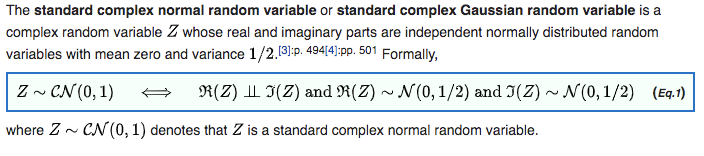

For $u \sim \mathcal{CN}(0, 1, 0)$ and $\mu\in \mathbb{C}$ we have
$$
    g(\mu)
        = \mathbb{E} \log \lvert u + \mu\rvert^2
        = \log \lvert \mu \rvert^2 - \mathop{Ei}{(-\lvert \mu \rvert^2)}
    \,, $$
where $\mathop{Ei}(x) = - \int_{-x}^\infty \tfrac{e^{-t}}t dt$.

Thus for $z \sim \mathcal{CN}(0, \alpha, 0)$, $\alpha > 0$, we get
$$
    \mathbb{E} \log \lvert z + \mu\rvert^2
        = \mathbb{E} \log \bigl\lvert \sqrt\alpha u + \mu\bigr\rvert^2
        = \mathbb{E} \log \alpha \bigl\lvert u + \tfrac\mu{\sqrt\alpha} \bigr\rvert^2
        = \log \alpha + g\bigl(\tfrac{\mu}{\sqrt\alpha}\bigr)
    \,. $$


Therefore
$$
\begin{align}
    KL(q\|p)
        &= \mathbb{E}_{q(z)} \log \tfrac{q(z)}{p(z)}
        = \mathbb{E}_{q(z)} \log q(z) - \mathbb{E}_{q(z)} \log p(z)
        \\
        &= - \log \pi e + \bigl(\tfrac\beta2 - 1\bigr) \log \alpha
        + (\beta - 2) \log \lvert \theta \rvert
        + \tfrac\beta2 g\bigl(\tfrac1{\sqrt\alpha}\bigr)
        + C
\end{align}
\,. $$

For $\beta = 2$ we get
$$
\begin{align}
    KL(q\|p)
        &= - \log \pi e + g\bigl(\tfrac1{\sqrt\alpha}\bigr) + C
        \\
        &= - \log \pi e + \log \bigl\lvert \tfrac1{\sqrt\alpha} \bigr\rvert^2
        - \mathop{Ei}{(-\bigl\lvert \tfrac1{\sqrt\alpha} \bigr\rvert^2)}
        + C
        \\
        &= - \log \pi e - \log \alpha + C
        - \mathop{Ei}{\bigl(-\tfrac1\alpha \bigr)}
\end{align}
\,. $$

<br>

In [ ]:
class ExpiFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)

        x_cpu = x.data.cpu().numpy()
        output = expi(x_cpu, dtype=x_cpu.dtype)
        return torch.from_numpy(output).to(x.device)

    @staticmethod
    def backward(ctx, grad_output):
        x = ctx.saved_tensors[-1]
        return grad_output * torch.exp(x) / x

torch_expi = ExpiFunction.apply

input = torch.randn(20, 20).to(torch.double)
assert torch.autograd.gradcheck(torch_expi, input.requires_grad_(True))

<br>

In [ ]:
from scipy.optimize.lbfgsb import fmin_l_bfgs_b

k_real = fmin_l_bfgs_b(fused_mse, np.r_[0.5, 0., 1., 0.5],
                       bounds=((None, None), (None, None), (None, None), (0.5, 0.5)),
                       args=(tr_log_alpha, tr_kl_real_mc))[0]

k_cplx = fmin_l_bfgs_b(fused_mse, np.r_[0.5, 0., 1., 1.],
                       bounds=((None, None), (None, None), (None, None), (1.0, 1.0)),
                       args=(tr_log_alpha, tr_kl_cplx_mc))[0]

In [ ]:
k_real_1701_05369 = np.r_[0.63576, 1.87320, 1.48695, 0.5]

In [ ]:
k_real_1701_05369, k_real, k_cplx

```text
(array([0.63576, 1.8732 , 1.48695, 0.5    ]),
 array([0.63567313, 1.88114543, 1.49136378, 0.5       ]),
 array([0.57810091, 1.45926293, 1.36525956, 1.        ]))
```

<br>

In [ ]:
kl_real_1701_05369 = kldiv_approx(k_real_1701_05369, log_alpha)
kl_real_approx = kldiv_approx(k_real, log_alpha)
kl_cplx_approx = kldiv_approx(k_cplx, log_alpha)

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, xlabel=r"$\log\alpha$", ylabel="-kld")

ax.plot(log_alpha, kl_real_mc - kl_real_1701_05369, label=r"$\mathbb{R}$ - arXiv:1701.05369", alpha=0.5)
ax.plot(log_alpha, kl_real_mc - kl_real_approx, label=r"$\mathbb{R}$ - lbfgs", alpha=0.5)
ax.plot(log_alpha, kl_cplx_mc - kl_cplx_approx, label=r"$\mathbb{C}$ - lbfgs")

ax.axhline(0., c="k", zorder=-10)
ax.legend(ncol=3)
ax.set_title("Regression residuals of the MC estimate of the KL-div for ARD")
plt.show()

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, xlabel=r"$\log\alpha$", ylabel="-kld")

ax.plot(log_alpha, kl_div_exact(log_alpha), c="k", label=r"$\mathbb{C}$ - exact", lw=2)

ax.plot(log_alpha, kl_real_mc, label=r"$\mathbb{R}$")
ax.plot(log_alpha, kl_cplx_mc, label=r"$\mathbb{C}$")

ax.legend(ncol=3)
ax.set_title("the MC estimate of the KL-div for ARD")
plt.show()

In [ ]:
abs(kl_real_mc - kl_real_1701_05369).max(), \
abs(kl_real_mc - kl_real_approx).max(), \
abs(kl_cplx_mc - kl_cplx_approx).max()

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, xlabel=r"$\log\alpha$", ylabel="-kld")

mid_log_alpha = (log_alpha[1:] + log_alpha[:-1]) / 2
d_log = log_alpha[1:] - log_alpha[:-1]
ax.plot(mid_log_alpha, np.diff(kl_real_mc) / d_log, label=r"$\partial \mathbb{R}$-approx")
ax.plot(mid_log_alpha, np.diff(kl_cplx_mc) / d_log, label=r"$\partial \mathbb{C}$-approx")

ax.axhline(0., c="k", zorder=-10)
ax.legend(ncol=2)

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, xlabel=r"$\log\alpha$", ylabel="-kld")

ax.plot(log_alpha, kl_cplx_mc, label=r"$\mathbb{C}$ - mc")
ax.plot(log_alpha, kl_cplx_approx, label=r"$\mathbb{C}$ - approx")

ax.plot(log_alpha, kl_real_mc, label=r"$\mathbb{R}$ - mc")
ax.plot(log_alpha, kl_real_approx, label=r"$\mathbb{R}$ - approx")

# ax.set_xlim(0, 20)
# ax.set_ylim(0.55, 0.6)

ax.legend()

In [ ]:
assert False, """STOP!"""

Negative kl-div approximation from arxiv:1701.05369.
$$
- KL(\mathcal{N}(w\mid \theta, \alpha \theta^2) \|
        \tfrac1{\lvert w \rvert})
    = \tfrac12 \log \alpha
      - \mathbb{E}_{\xi \sim \mathcal{N}(1, \alpha)}
        \log{\lvert \xi \rvert} + C
%     = \tfrac12 \log \alpha
%       - \log{\sqrt{\alpha}}
%       - \tfrac12 \mathbb{E}_{\xi \sim \mathcal{N}(0, 1)}
%         \log{\bigl\lvert \tfrac1{\sqrt{\alpha}} + \xi \bigr\rvert^2} + C
    = - \tfrac12 \mathbb{E}_{\xi \sim \mathcal{N}(0, 1)}
        \log{\bigl\lvert \xi + \tfrac1{\sqrt{\alpha}}\bigr\rvert^2} + C
    \,. $$

In [ ]:
def kldiv_real_mc_reduced(log_alpha, m=1e5):
    kld, m = np.zeros_like(log_alpha), int(m)
    for i, la in enumerate(tqdm.tqdm(log_alpha)):
        eps = np.random.randn(m)
        kld[i] = np.log(abs(eps + np.exp(-0.5 * la))).mean(axis=-1)
    return -kld

Suppose $q(z) = \mathcal{CN}(\theta, \alpha \lvert\theta\rvert^2, 0)$ and
$p(z) \propto \lvert z\rvert^{-\beta}$. Each term in the sum
$$
\begin{align}
    KL(q\|p)
        &= \mathbb{E}_{q(z)} \log \tfrac{q(z)}{p(z)}
        = \mathbb{E}_{q(z)} \log q(z) - \mathbb{E}_{q(z)} \log p(z)
%         \\
%         &= - \log \bigl\lvert \pi e \alpha \lvert\theta\rvert^2 \bigr\rvert
%         + \beta \mathbb{E}_{q(z)} \log \lvert z\rvert
%         + C
%         \\
%         &= - \log \pi e
%         - \log \alpha \lvert\theta\rvert^2
%         + \beta \mathbb{E}_{\varepsilon \sim \mathcal{CN}(1, \alpha, 0)}
%             \log \lvert \theta \rvert \lvert \varepsilon\rvert
%         + C
%         \\
%         &= - \log \pi e - \log \alpha
%         + \tfrac{\beta - 2}2 \log \lvert \theta \rvert^2
%         + \beta \mathbb{E}_{\varepsilon \sim \mathcal{CN}(1, \alpha, 0)}
%             \log \lvert \varepsilon\rvert
%         + C
%         \\
%         &= - \log \pi e - \log \alpha
%         + \tfrac{\beta - 2}2 \log \lvert \theta \rvert^2
%         + \tfrac\beta2 \mathbb{E}_{z \sim \mathcal{CN}(0, \alpha, 0)}
%             \log \bigl\lvert z + 1 \bigr\rvert^2
%         + C
        \\
        &= - \log \pi e
        + \tfrac{\beta - 2}2 \log \lvert \theta \rvert^2
        + \tfrac{\beta-2}2 \log\alpha
        + \tfrac\beta2 \mathbb{E}_{z \sim \mathcal{CN}(0, 1, 0)}
            \log \bigl\lvert z + \tfrac1{\sqrt{\alpha}} \bigr\rvert^2
        + C
        \\
        &= - \log \pi e
        + \tfrac{\beta - 2}2 \log \lvert \theta \rvert^2
        + \tfrac{\beta - 2}2 \log\alpha
        + \tfrac\beta2 \mathbb{E}_{\varepsilon \sim \mathcal{N}_2\bigl(0, \tfrac12 I\bigr)}
            \log \bigl((\varepsilon_1 + \tfrac1{\sqrt{\alpha}})^2 + \varepsilon_2^2\bigr)
        + C
\end{align}
\,. $$

Negative kl-div divergence for $\mathbb{C}$ gaussian and $\beta=2$:
$$
- KL(\mathcal{N}^{\mathbb{C}}(w\mid \theta, \alpha \lvert\theta\rvert^2, 0) \|
        \tfrac1{\lvert w \rvert})
    = \log \pi e
    - \mathbb{E}_{z \sim \mathcal{CN}(0, 1, 0)}
        \log \bigl\lvert z + \tfrac1{\sqrt{\alpha}} \bigr\rvert^2
    + C
    \,. $$

In [ ]:
def kldiv_cplx_mc_reduced(log_alpha, m=1e5):
    kld, m, isq2 = np.zeros_like(log_alpha), int(m), 1/np.sqrt(2)
    for i, la in enumerate(tqdm.tqdm(log_alpha)):
        eps = isq2 * np.random.randn(m) + 1j * isq2 * np.random.randn(m)
        kld[i] = 2 * np.log(abs(eps + np.exp(-0.5 * la))).mean(axis=-1)
    return -kld

In [ ]:
assert False, """STOP!"""
kld_real_2 = kldiv_real_mc_reduced(log_alpha, m=1e7)
kld_cplx_2 = kldiv_cplx_mc_reduced(log_alpha, m=1e7)

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, xlabel=r"$\log\alpha$", ylabel="-kld")

ax.plot(log_alpha, kl_real_mc, label=r"$\mathbb{R}$")
ax.plot(log_alpha, kld_real_2, label=r"2-$\mathbb{R}$")

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, xlabel=r"$\log\alpha$", ylabel="-kld")

ax.plot(log_alpha, kl_cplx_mc, label=r"$\mathbb{C}$")
ax.plot(log_alpha, kld_cplx_2, label=r"2-$\mathbb{C}$")

#### Exact kl-div grad for $\mathbb{R}$-gaussian

Turns out the expectation $
  \mathbb{E}_{z \sim \mathcal{N}(0, 1)}
    \log{\bigl\lvert z + \tfrac1{\sqrt{\alpha}} \bigr\rvert^2}
$ is equal to $
  - \gamma - \log2 + g_1(\tfrac1\alpha)
$

where

$$
g_m(x)
% e^{-x} \sum_{n=0}^{\infty} \frac{x^n}{n!} \psi(n + m / 2)
    = e^{-x} \sum_{n \geq 0} \frac{x^n}{n!} \psi(n + \tfrac{m}2)
    \,, $$

and $\psi(x)$ is the digamma function, i.e. $\psi(x) = \tfrac{d}{dx} \Gamma(x)$.
In particular,

$$
g_1(x)
    = e^{-x} \sum_{n\geq 0} \frac{x^n}{n!} \sum_{p=1}^n \frac2{2p - 1}
    \,. $$

For a general $m\geq 1$ the value of $g$ is given by
$$
g(x) = \psi(\tfrac{m}2) - {{}_1 F_1}\bigl(0, \tfrac{m}2, -x\bigr)
    \,. $$

The derivative wrt $\alpha$ is 
$$
\tfrac{d}{d \alpha} g(\tfrac1\alpha)
    = -\tfrac1{\alpha^2} 
    g'(\tfrac1\alpha)
    \,. $$

Elementwise differentiation of $g$ yields:
$$
\frac{d}{d x} g(x)
    = e^{-x} \sum_{n\geq 1} \frac{x^{n-1}}{(n-1)!} \sum_{p=1}^n \frac2{2p - 1} - g(x)
%     = e^{-x} \sum_{n\geq 0} \frac{x^n}{n!} \sum_{p=1}^{n+1} \frac2{2p - 1} - g(x)
%     = e^{-x} \sum_{n\geq 0} \frac{x^n}{n!} \frac2{2(n+1) - 1}
    = e^{-x} \sum_{n\geq 0} \frac{x^n}{n!} (n + \tfrac12)^{-1}
    \,. $$

In [ ]:
from scipy.special import hyp1f1, digamma

In [ ]:
digamma(0.5) - hyp1f1(0, 0.5, -x)

Which turns out to be equal to (thanks Wolfram$\alpha$):

$$
\cdots
%     = e^{-x} \sum_{n=0}^{\infty} \frac{x^n}{n! (n+0.5)}
    = e^{-x} \sqrt{\pi} \tfrac{
        \mathrm{erfi}(\sqrt{x})
    }{\sqrt{x}}
    \,, $$

and can be computed using Dawson’s integral special function (in `scipy`) thus

$$
\cdots
    = 2 \tfrac{F(\sqrt{x})}{\sqrt{x}}
    \,, $$

where $F$ is Dawson’s integral $
    F(x) = e^{- x^2} \int_0^x e^{t^2} dt
$. Hence
$$
\tfrac{d}{d \alpha} g(\tfrac1\alpha)
    = -\tfrac2{\alpha \sqrt{\alpha}} 
    F(\tfrac1{\sqrt{\alpha}})
    \,. $$

In [ ]:
from scipy.special import dawsn

def deriv(log_alpha):
    return dawsn(np.exp(- 0.5 * log_alpha)) * np.exp(- 0.5 * log_alpha)

In [ ]:
class ExpiFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x):
        ctx.save_for_backward(x)

        x_cpu = x.data.cpu().numpy()
        output = expi(x_cpu, dtype=x_cpu.dtype)
        return torch.from_numpy(output).to(x.device)

    @staticmethod
    def backward(ctx, grad_output):
        x = ctx.saved_tensors[-1]
        return grad_output * torch.exp(x) / x

torch_expi = ExpiFunction.apply

input = torch.randn(20, 20).to(torch.double)
assert torch.autograd.gradcheck(torch_expi, input.requires_grad_(True))

In [ ]:
plt.plot(mid_log_alpha, np.diff(kl_real_mc) / d_log, label=r"$\partial \mathbb{R}$-approx")
plt.plot(log_alpha, deriv(log_alpha))

In [ ]:
from scipy.special import erf, expit

x = np.linspace(-10, 10, num=513)
plt.plot(x, 1 - expit(x))
plt.plot(x, 1 - (erf(x) + 1) / 2)

<br>

### Output of a random complex-linear function

Consider $y = Wx = (I \otimes x^\top) \mathop{vec}(W)$ for
$$
    \mathop{vec}(W) \sim \mathcal{CN}_{[d_1\times d_0]}
        \Bigl(\mathop{vec} \theta, K, C\Bigr)
    \,, $$
for $K \in \mathbb{C}^{[d_1\times d_0]\times [d_1\times d_0]}$ diagonal $K = \mathop{diag}(k_\omega)$.

Since $K = K^H$ we must have $k_\omega = \overline{k_\omega}$, whence $k_\omega \in \mathbb{R}$
and $k_\omega \geq 0$. The relation matrix $C$ is also diagonal with $c_\omega \in \mathbb{C}$.

Observe that for $A = I \otimes x^\top$ we have $A^H = I \otimes \bar{x}$
and $A^\top = I \otimes x$ both $[d_1\times d_0]\times [d_1\times 1]$ matrices.
$$
    A K A^H
        = \sum_{i=1}^{d_1} \sum_{j=1}^{d_0}
            A (e_i \otimes e_j) k_{ij} (e_i \otimes e_j)^\top A^H
        = \sum_{i=1}^{d_1} \sum_{j=1}^{d_0} e_i e_i^\top x_j k_{ij} \bar{x}_j
        = \sum_{i=1}^{d_1} e_i e_i^\top \Bigl\{ \sum_{j=1}^{d_0} k_{ij} x_j \bar{x}_j \Bigr\}
    \,, $$
and
$$
    A C A^\top
        = \sum_{i=1}^{d_1} \sum_{j=1}^{d_0}
            A (e_i \otimes e_j) c_{ij} (e_i \otimes e_j)^\top A^\top
        = \sum_{i=1}^{d_1} \sum_{j=1}^{d_0} e_i e_i^\top x_j c_{ij} x_j
        = \sum_{i=1}^{d_1} e_i e_i^\top \Bigl\{ \sum_{j=1}^{d_0} c_{ij} x_j x_j \Bigr\}
    \,, $$

Therefore
$$
    y \sim \mathcal{CN}_{d_1}\Bigl(
        \theta x, \sum_{i=1}^{d_1} e_i e_i^\top \Bigl\{ \sum_{j=1}^{d_0} k_{ij} x_j \bar{x}_j \Bigr\},
        \sum_{i=1}^{d_1} e_i e_i^\top \Bigl\{ \sum_{j=1}^{d_0} c_{ij} x_j x_j \Bigr\}
    \Bigr)
    = \bigotimes_{i=1}^{d_1}
        \mathcal{CN}\Bigl(
            \sum_{j=1}^{d_0} \theta_{ij} x_j,
            \sum_{j=1}^{d_0} k_{ij} x_j \bar{x}_j,
            \sum_{j=1}^{d_0} c_{ij} x_j x_j
        \Bigr)
    \,. $$

Let's suppose that the complex random vector $\mathop{vec}W$ is proper, i.e. $C = 0$.
Then $y$ is itself proper, has independent components and
$$
    y_i \sim \mathcal{CN}\Bigl(
            \sum_{j=1}^{d_0} \theta_{ij} x_j,
            \sum_{j=1}^{d_0} k_{ij} \lvert x_j \rvert^2, 0
        \Bigr)
    \,. $$
In a form, more aligned with `the reparametrization trick`, the expression for the
output is
$$
    y_i
        = \sum_{j=1}^{d_0} \theta_{ij} x_j
        + \sqrt{\sum_{j=1}^{d_0} k_{ij} \lvert x_j \rvert^2}
            \varepsilon_i
    \,,
    \varepsilon_i \sim \mathcal{CN}\Bigl(
            0, 1, 0
        \Bigr)
    \,. $$

Observe that if $z \sim \mathcal{CN}(\mu, \gamma, 0)$ for $\gamma \in \mathbb{C}$, then
$\gamma = \gamma^H = \bar{\gamma}$, $\gamma\in \mathbb{R}$ and $\gamma \geq 0$:
$$
    \begin{pmatrix}\Re z \\ \Im z\end{pmatrix}
    = \begin{pmatrix}\Re \mu \\ \Im \mu \end{pmatrix}
    + \sqrt{\gamma} \varepsilon
    \,,
        \varepsilon \sim \mathcal{N}_{2} \bigl( 0, \tfrac12 I\bigr)
    \,,
$$

The reparametrization $z_\omega = \theta_\omega \varepsilon_\omega$ for
$\varepsilon_\omega \sim \mathcal{CN}(1, \alpha_\omega, 0)$.

$$
    z_\omega
        = \theta_\omega \varepsilon_\omega
    \,,
    \varepsilon_\omega
        \sim \mathcal{CN}(1, \alpha_\omega, 0)
    \Leftrightarrow
    z_\omega
        \sim \mathcal{CN}(\theta_\omega, \alpha_\omega \lvert \theta_\omega\rvert^2, 0)
    \Leftrightarrow
    z_\omega
        = \theta_\omega + \sigma_\omega \varepsilon_\omega
    \,, \sigma_\omega^2
        = \alpha_\omega \lvert \theta_\omega\rvert^2
    \,,
    \varepsilon_\omega
        \sim \mathcal{CN}(0, 1, 0)
    \,. $$

<br>

In [ ]:
# !pip install git+https://github.com/ivannz/cplxmodule.git --upgrade

In [ ]:
import torch.nn
import torch.nn.functional as F

In [ ]:
x = np.random.randn(100, 10) + 1j * np.random.randn(100, 10)

In [ ]:
tr_x = torch.tensor(np.concatenate([x.real, x.imag], axis=-1),
                    dtype=torch.float32)

In [ ]:
from cplxmodule.layers import CplxLinear
from automated.vardropout import CplxLinearARD

In [ ]:
lin_a = torch.nn.Sequential(
    RealToCplx(),
    CplxLinearARD(x.shape[-1], 100, bias=True),
    CplxToReal()
)

lin_b = torch.nn.Sequential(
    RealToCplx(),
    CplxLinear(x.shape[-1], 100, bias=True),
    CplxToReal()
)

lin_a.load_state_dict(lin_b.state_dict(), strict=False)

In [ ]:
lin_a.eval()

In [ ]:
from automated.utils import allclose

assert all(map(allclose, lin_a(tr_x), lin_b(tr_x)))

In [ ]:
from automated.vardropout import penalties
from cplxmodule import CplxToReal, RealToCplx

In [ ]:
from cplxmodule.activation import CplxModReLU

In [ ]:
model = torch.nn.Sequential(
    RealToCplx(),
    CplxLinearARD(10, 100),
    CplxModReLU(threshold=None),
    CplxLinearARD(100, 10),
    CplxToReal()
)

<br>

In [ ]:
optim = torch.optim.Adam(model.parameters())
for _ in tqdm.tqdm(range(400)):
    optim.zero_grad()

    out = F.mse_loss(tr_x, model(tr_x))
    out += sum(penalties(model))

    out.backward()
    optim.step()

In [ ]:
from automated.vardropout import sparsity, make_sparse

In [ ]:
sparsity(model, 1.0)

In [ ]:
sp_model.eval()

In [ ]:
sp_model = make_sparse(model, 1.0, kind="sparse")

In [ ]:
sp_model[2].threshold

In [ ]:
sp_model(tr_x)

In [ ]:
import torch
import torch.nn.functional as F

tr_kl_cplx_mc = torch.from_numpy(kl_cplx_mc)
tr_kl_real_mc = torch.from_numpy(kl_real_mc)
tr_log_alpha = torch.from_numpy(log_alpha)

def fused_mse_real(k):
    tr_k = torch.from_numpy(k).requires_grad_(True)

    k1, k2, k3 = tr_k
    sigmoid = torch.sigmoid(k2 + k3 * tr_log_alpha)
    softplus = - 0.5 * F.softplus(- tr_log_alpha)

    approx = k1 * sigmoid + softplus

    loss = F.mse_loss(approx, tr_kl_real_mc, reduction="mean")
    loss.backward()

    return loss.item(), tr_k.grad.numpy()

def fused_mse_cplx(k):
    tr_k = torch.from_numpy(k).requires_grad_(True)

    k1, k2, k3 = tr_k
    sigmoid = torch.sigmoid(k2 + k3 * tr_log_alpha)
    # errf = (torch.erf(k2 + k3 * tr_log_alpha) + 1) / 2  # erf - suxx!
    softplus = - F.softplus(- tr_log_alpha)

    approx = k1 * sigmoid + softplus

    loss = F.mse_loss(approx, tr_kl_cplx_mc, reduction="mean")
    loss.backward()
    
    return loss.item(), tr_k.grad.numpy()

In [ ]:
from scipy.special import expit

def kldiv_real_approx(log_alpha, k):
    k1, k2, k3 = k
    C = 0  # -k1

    sigmoid = expit(k2 + k3 * log_alpha)
    softplus = - 0.5 * np.logaddexp(0, -log_alpha)
    return k1 * sigmoid + softplus + C

def kldiv_cplx_approx(log_alpha, k):
    k1, k2, k3 = k
    C = 0  # -k1

    sigmoid = expit(k2 + k3 * log_alpha)
    softplus = - np.logaddexp(0, -log_alpha)
    return k1 * sigmoid + softplus + C

In [ ]:
assert False

<br>

# trunk

A complex Gaussian random vector $z\in \mathbb{C}^d$ is completely determiend by the
distribution of $\begin{pmatrix}\Re z \\ \Im z\end{pmatrix} \in \mathbb{R}^{[2\times d]}$
or equivalently a $\mathbb{C}^{[2\times d]}$ vector:
$$
    \begin{pmatrix}z \\ \bar{z} \end{pmatrix}
        = \underbrace{\begin{pmatrix}I & iI \\ I & -iI \end{pmatrix}}_{\Xi}
        \begin{pmatrix}\Re z \\ \Im z\end{pmatrix}
    \,. $$
For a rv $z$ this vector is called the augmented $z$ vector.

Now the transjugation (Hermitian transpose) of $\Xi$ is 
$$
    \Xi^H
        = \begin{pmatrix}I & I \\ -iI & iI \end{pmatrix}
    \,, $$
and $ \Xi^H \Xi = \Xi \Xi^H = \begin{pmatrix} 2I & 0 \\ 0 & 2I \end{pmatrix}$.
Therefore, $\Xi^{-H} = \tfrac12 \Xi$ and $\Xi^{-1} = \tfrac12 \Xi^H$.
Thus
$$
    \begin{pmatrix}\Re z \\ \Im z\end{pmatrix}
        = \Xi^{-1} \begin{pmatrix}z \\ \bar{z} \end{pmatrix}
        = \tfrac12 \Xi^H \begin{pmatrix}z \\ \bar{z} \end{pmatrix}
    \,. $$

Consider the complex covariance of the augmented $z$:
$$
    \mathbb{E}
        \begin{pmatrix}z \\ \bar{z} \end{pmatrix}
        \begin{pmatrix}z \\ \bar{z} \end{pmatrix}^H
        = \begin{pmatrix}
            \mathbb{E} z \bar{z}^\top & \mathbb{E} z z^\top \\
            \mathbb{E} \bar{z} \bar{z}^\top & \mathbb{E} \bar{z} z^\top
        \end{pmatrix}
        = \begin{pmatrix} K & C \\ \bar{C} & \bar{K} \end{pmatrix}
    \,, $$
since effectively $z^H = (\bar{z})^\top = \overline{\bigl(z^\top\bigr)}$.

Since $$
    \bigl(z z^\top\bigr)^H
        = \overline{\bigl(z z^\top\bigr)}^\top
        = \bigl(\bar{z} \bar{z}^\top\bigr)^\top
        = \bar{z}^{\top\top} \bar{z}^\top
        = \bar{z} \bar{z}^\top
    \,, $$
we have $\bar{C} = C^H$. This implies the following constraints on $K$ (the
covariance) and $C$ (the pseudo-covariance): $K \succeq 0$, $K = K^H$ and
$C=C^\top$.

This complex covariance matrix corresponds to the following real-vector covariance:
$$
    \mathbb{E}
        \begin{pmatrix}\Re z \\ \Im z\end{pmatrix}
        \begin{pmatrix}\Re z \\ \Im z\end{pmatrix}^\top
        = \mathbb{E}
            \begin{pmatrix}\Re z \\ \Im z\end{pmatrix}
            \begin{pmatrix}\Re z \\ \Im z\end{pmatrix}^H
        = \Xi^{-1}
            \begin{pmatrix} K & C \\ \bar{C} & \bar{K} \end{pmatrix}
        \Xi^{-H}
        = \tfrac14 \Xi^H \begin{pmatrix}
            K & C \\ \bar{C} & \bar{K}
        \end{pmatrix} \Xi  % \begin{pmatrix}I & iI \\ I & -iI \end{pmatrix}
%         = \tfrac14 \begin{pmatrix}I & I \\ -iI & iI \end{pmatrix}
%         \begin{pmatrix}
%             K + C & i (K - C) \\ \bar{C} + \bar{K} & i(\bar{C} - \bar{K})
%         \end{pmatrix}
%         = \tfrac14 \begin{pmatrix}
%              K + \bar{K} + C + \bar{C}
%                  & i (K - \bar{K} - (C - \bar{C}))
%                      \\
%              - i (K - \bar{K} + C - \bar{C})
%                  & K + \bar{K} - (C + \bar{C})
%         \end{pmatrix}
        = \tfrac12 \begin{pmatrix}
             \Re (K + C) & - \Im (K - C) \\
             \Im (K + C) & \Re (K - C)
        \end{pmatrix}
        = \tfrac12 \begin{pmatrix}
             \Re (K + C) & \Im (\overline{K - C}) \\
             \Im (K + C) & \Re (\overline{K - C})
        \end{pmatrix}
    \,, $$
since $- \Im z = \Im \bar{z}$ and $\Re z = \Re \bar{z}$.

$$ \Im (K+C)^\top
    = \Im (K^\top+C^\top)
    = \Im (\bar{K} + C)
    = \Im \bar{K} + \Im C
    = -\Im K + \Im C
    = -\Im (K - C)
    \,. $$

$$ \Re (K-C)^\top
    = \Re (K^\top - C^\top)
    = \Re (\bar{K} - C)
    = \Re \bar{K} - \Re C
    = \Re K - \Re C
    = \Re (K - C)
    \,. $$

<br>

<span style="color:red;">**TODO**</span>
Futhermore, the whole matrix must be complex positive semi-definite.
$$
    \begin{pmatrix}a \\ b \end{pmatrix}^\top
        \begin{pmatrix}
             \Re (K + C) & - \Im (K - C) \\
             \Im (K + C) & \Re (K - C)
        \end{pmatrix}
    \begin{pmatrix}a \\ b \end{pmatrix}
        = \tfrac14 \begin{pmatrix}a \\ b \end{pmatrix}^H \Xi^H
            \begin{pmatrix}
                K & C \\ \bar{C} & \bar{K}
            \end{pmatrix}
        \Xi \begin{pmatrix}a \\ b \end{pmatrix}
        = \tfrac14 \begin{pmatrix}a + i b \\ a - i b \end{pmatrix}^H
            \begin{pmatrix}
                K & C \\ \bar{C} & \bar{K}
            \end{pmatrix}
        \begin{pmatrix}a + i b \\ a - i b \end{pmatrix}
        = \tfrac14 \begin{pmatrix}z \\ \bar{z} \end{pmatrix}^H
            \begin{pmatrix}
                K & C \\ \bar{C} & \bar{K}
            \end{pmatrix}
        \begin{pmatrix}z \\ \bar{z} \end{pmatrix}
%         = \tfrac14 \begin{pmatrix}z \\ \bar{z} \end{pmatrix}^H
%             \begin{pmatrix}
%                 K z + C \bar{z} \\ \bar{C} z + \bar{K} \bar{z}
%             \end{pmatrix}
%         = \tfrac14 \bigl(
%                 z^H K z + z^H C \bar{z} + \bar{z}^H \bar{C} z + \bar{z}^H \bar{K} \bar{z}
%         \bigr)
        = \tfrac14 \bigl(
                z^H K z + z^H C \bar{z} + \overline{z^H C \bar{z}} + \overline{z^H K z}
        \bigr)
        = \tfrac12 \Re (z^H K z) + \tfrac12 \Re (z^H C \bar{z})
    \,. $$

<br>

Let $A$ and $B$ be conforming $\mathbb{C}$-valued matrices. Let
$$
    \hat{\cdot}
    \colon \mathbb{C}^{n \times m} \to \mathbb{R}^{2n \times 2m}
    \colon A \mapsto \begin{pmatrix}
            \Re A & - \Im A \\
            \Im A & \Re A \\
        \end{pmatrix}
    \,. $$
$$
\begin{align}
    AB = \Re A \Re B - \Im A \Im B + i (\Re A \Im B + \Im A \Re B)
    &\Leftrightarrow
        \begin{pmatrix}
            \Re A & - \Im A \\
            \Im A & \Re A \\
        \end{pmatrix}
        \begin{pmatrix}
            \Re B & - \Im B \\
            \Im B & \Re B \\
        \end{pmatrix}
        = \begin{pmatrix}
            \Re A \Re B - \Im A \Im B & - (\Re A \Im B + \Im A \Re B) \\
            \Im A \Re B + \Re A \Im B & \Re A \Re B - \Im A \Im B\\
        \end{pmatrix}
        \,, \\
    \widehat{AB} &= \hat{A} \hat{B}
        \,, \\
    \widehat{A^H} &= \hat{A}^\top
        \,, \\
    I_{2n}
        = \widehat{I}
        = \widehat{A A^{-1}}
        = \hat{A} \widehat{A^{-1}}
        &\Rightarrow
        \widehat{A^{-1}} = (\hat{A})^{-1}
        \,, \\
    \det \hat{A}
        = \det \begin{pmatrix}
            I & i I \\
            0 & I \\
        \end{pmatrix}
        \begin{pmatrix}
            \Re A & - \Im A \\
            \Im A & \Re A \\
        \end{pmatrix}
        \begin{pmatrix}
            I & - i I \\
            0 & I \\
        \end{pmatrix}
%         = \det \begin{pmatrix}
%             \Re A + i \Im A & - \Im A + i \Re A \\
%             \Im A & \Re A \\
%         \end{pmatrix}
%         \begin{pmatrix}
%             I & - i I \\
%             0 & I \\
%         \end{pmatrix}
        &= \det \begin{pmatrix}
            A & i A \\
            \Im A & \Re A \\
        \end{pmatrix}
        \begin{pmatrix}
            I & - i I \\
            0 & I \\
        \end{pmatrix}
        = \det \begin{pmatrix}
            A & 0 \\
            \Im A & \bar{A} \\
        \end{pmatrix}
        = \det A \det \bar{A}
        = \det A \overline{\det A}
        \,.
\end{align}
$$

On vectors the hat-operator works by treating vectors as one-column matrices.
$$
    \widehat{u^H v}
        = \widehat{u^H} \hat{v}
        = \hat{u}^\top \hat{v}
        = \begin{pmatrix}
            \Re u^\top & \Im u^\top \\
            - \Im u^\top & \Re u^\top
        \end{pmatrix} \begin{pmatrix}
            \Re v & - \Im v \\
            \Im v & \Re v
        \end{pmatrix}
        = \begin{pmatrix}
            \Re u^\top \Re v + \Im u^\top \Im v
                & - (\Re u^\top \Im v - \Im u^\top \Re v) \\
            \Re u^\top \Im v - \Im u^\top \Re v
                & \Im u^\top \Im v + \Re u^\top \Re v
        \end{pmatrix}
    \,. $$

If $Q\in \mathbb{C}^{n\times n}$ is postive semidefinite, then $z^H Q z \geq 0$ for all $z\in \mathbb{C}^n$.
Then
$$
    0 \leq z^H Q z
        = \Re z^H Q z
        \equiv \begin{pmatrix}
            \Re z^H Q z & 0 \\
            0 & \Re z^H Q z
        \end{pmatrix}
        = \widehat{z^H Q z}
        = \widehat{z^H} \widehat{Q z}
        = \hat{z}^\top \hat{Q} \hat{z}
    \,. $$

<br>